In [1]:
# This is to change the working directory to the repo root rather than the notebooks folder
# Only run this cell once or restart the kernal if ran more than once
import os

os.chdir("..")
print("New CWD:", os.getcwd())

New CWD: C:\Users\Rbjor\Downloads\Repo - Bricscan


In [3]:
# Libraries
import os
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image
import random

In [4]:
# Path to the dataset
DATA_DIR = Path("data/processed")
TRAIN_DIR = DATA_DIR / "train"
VAL_DIR = DATA_DIR / "val"
TEST_DIR = DATA_DIR / "test"

In [5]:
classes = sorted([d.name for d in TRAIN_DIR.iterdir() if d.is_dir()])
len(classes), classes[:10]  # shows first 10


(431,
 ['10197',
  '10201',
  '10288',
  '10314',
  '10928',
  '11090',
  '11153',
  '11211',
  '11212',
  '11213'])

In [7]:
# Checking out # of classes and inspecting first 10
classes = sorted([d.name for d in TRAIN_DIR.iterdir() if d.is_dir()])
print("Number of classes:", len(classes))
print("First 10 classes:", classes[:10])

Number of classes: 431
First 10 classes: ['10197', '10201', '10288', '10314', '10928', '11090', '11153', '11211', '11212', '11213']


In [8]:
# Inspecting the train/val/test amounts
def count_images_in_split(split_dir: Path):
    per_class = {}
    for cls in classes:
        cls_dir = split_dir / cls
        if cls_dir.exists():
            per_class[cls] = len([p for p in cls_dir.iterdir() if p.is_file()])
        else:
            per_class[cls] = 0
    total = sum(per_class.values())
    return total, per_class

train_total, train_counts = count_images_in_split(TRAIN_DIR)
val_total, val_counts = count_images_in_split(VAL_DIR)
test_total, test_counts = count_images_in_split(TEST_DIR)

print("Train total:", train_total)
print("Val total:", val_total)
print("Test total:", test_total)

print("\nTrain min/max per class:", min(train_counts.values()), "/", max(train_counts.values()))
print("Val min/max per class:", min(val_counts.values()), "/", max(val_counts.values()))
print("Test min/max per class:", min(test_counts.values()), "/", max(test_counts.values()))

Train total: 61861
Val total: 7567
Test total: 8107

Train min/max per class: 8 / 672
Val min/max per class: 1 / 84
Test min/max per class: 1 / 85


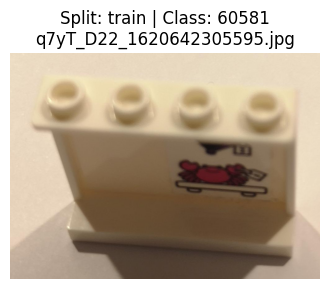

In [9]:
# Loading in an image example
def show_random_image(split_dir: Path):
    cls = random.choice(classes)
    img_files = [p for p in (split_dir / cls).iterdir() if p.is_file()]
    img_path = random.choice(img_files)

    img = Image.open(img_path)
    plt.figure(figsize=(4, 4))
    plt.imshow(img)
    plt.title(f"Split: {split_dir.name} | Class: {cls}\n{img_path.name}")
    plt.axis("off")
    plt.show()

show_random_image(TRAIN_DIR)
